# Import libraries

In [27]:
import os
import getpass
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [28]:
question_significance = {
    "seating_question_1": "Salt or Paprika?",
    "seating_question_2": "Which starter pokemon would you choose?",
    "seating_question_3": "Which Hogward house are you?",
    "seating_question_4": "Ideal friday evening?",
    "seating_question_5": "What's your favorite drink?",
    "seating_question_6": "What is most likely to exist?",
    "seating_question_7": "What is the best aroma?",
    "seating_question_8": "What where we talking about?",
    "seating_question_9": "What is your favoured language?",
    "seating_question_10": "Who do you prefer?",
}

In [29]:

server = "ec2-54-72-196-9.eu-west-1.compute.amazonaws.com"
db = "d2fect8juldk3k"
user = "puybkltrealynp"
pswd = getpass.getpass(prompt="Enter password: ")
pswd_to_enter = "10aefdea5dcd6a4366ab1e0f46cbf91366144b7a3ad7252478db2c63357fec4e"
# Set the PGPASSWORD environment variable
os.environ['PGPASSWORD'] = pswd

# Execute the PostgreSQL command without specifying the password
os.system(f"psql -h {server} -U {user} -d {db} -c 'SELECT name, email, name, family_name, has_answered_form, answer_diner, plusones, seating_question_1, seating_question_2, seating_question_3, seating_question_4, seating_question_5, seating_question_6, seating_question_7, seating_question_8, seating_question_9, seating_question_10, seating_question_11, seating_question_12, seating_question_13, seating_question_14, seating_question_15 FROM users;' -o seatings.csv")


Enter password:  ········


0

# Load complete database

In [30]:
full_csv = pd.read_csv(f"seatings.csv", delimiter="|")
# Strip leading and trailing spaces from every element in the DataFrame
full_csv = full_csv.applymap(lambda x: x.strip() if isinstance(x, str) else x)
full_csv.columns = full_csv.columns.str.strip()
full_csv = full_csv.dropna()

/tmp/ipykernel_29208/2183413473.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  full_csv = full_csv.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [71]:
full_csv['email'] = full_csv['email'].str.lower()
full_csv['email'] = full_csv['email'].str.rstrip('.')
full_csv.to_csv(f"seating_cleaned.csv")
full_csv

,name,email,name .1,family_name,has_answered_form,answer_diner,plusones,seating_question_1,seating_question_2,seating_question_3,...,seating_question_6,seating_question_7,seating_question_8,seating_question_9,seating_question_10,seating_question_11,seating_question_12,seating_question_13,seating_question_14,seating_question_15
1,Sunshine,alexr89@hotmail.fr,Sunshine,Renie,no,no,,,,,...,,,,,,,,,,
2,Hortish,hortensevincotte@gmail.com,Hortish,de Brouwer,no,no,,,,,...,,,,,,,,,,
3,MV,mvlvputbus@gmail.com,MV,d'Ursel,no,no,,,,,...,,,,,,,,,,
4,Pierre,pietdel@gmail.com,Pierre,Delacroix,no,no,,,,,...,,,,,,,,,,
5,Nabs,avanvolsem@hotmail.com,Nabs,Vanvo,no,no,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Dara,khosrowshahidara@gmail.com,Dara,,no,no,,,,,...,,,,,,,,,,
217,Tanine,tanine.daryoush@gmail.com,Tanine,,no,no,,,,,...,,,,,,,,,,
218,BigNickkk,bignick@blasband.com,BigNickkk,Blasband,yes,no,,,,,...,,,,,,,,,,
219,Reny <3,lukitoreny@hotmail.com,Reny <3,,no,no,,,,,...,,,,,,,,,,


# Load additional information

In [84]:
additional = pd.read_csv(f"important_info.csv", delimiter=",",header=0)
additional['email'] = additional['email'].str.lower()
additional['email'] = additional['email'].str.rstrip('.')
additional

,email,Sex,friend_of,table
0,victor.stinglhamber@gmail.com,male,m,1.0
1,bertichat@gmail.com,male,m,1.0
2,fdelimburg@gmail.com,male,m,1.0
3,jdursel@gmail.com,male,m,1.0
4,harold.loop@gmail.com,male,m,1.0
...,...,...,...,...
174,bignick@blasband.com,male,m,NaN
175,lukitoreny@hotmail.com,female,m,NaN
176,khosrowshahidara@gmail.com,male,m,NaN
177,nikou.kh03@gmail.com,female,m,NaN


In [85]:
merged_df = pd.merge(full_csv[['email','name']], additional[['email']], on='email', how='outer', suffixes=('_df1', '_df2'))
# Convert lists to sets
set1 = set(list(full_csv['email']))
set2 = set(list(additional['email']))

# Find elements not shared by both sets
elements_not_shared = set1.symmetric_difference(set2)

In [86]:
elements_not_shared

{'?',
 'adansembourg@gmail.com',
 'alex.wynaendts@db.com',
 'alexdehemptinne90@gmail.com',
 'alexis.philippartdefoy@gmail.com',
 'alexis.phillipartdefoy@gmail.com',
 'ali@digitalpark.be',
 'alice.athanassiadis@gmail.com',
 'amarschall@ab-marschall.de',
 'amelie.thibautdem@gmail.com',
 'ami@dg.com',
 'anastasiadeguerre@gmail.com',
 'arnaud.decleve0807@gmail.com',
 'arnouddenicolay@gmail.com',
 'audedejamblinne@yahoo.fr',
 'azinedeh@gmail.com',
 'camille.testard@protonmail.com',
 'celestinedec@gmail.com',
 'chdelachapelle@gmail.com',
 'clotildeboel@me.com',
 'costepia@gmail.com',
 'cwynaendts@gmail.com',
 'ddansembourg@hotmail.com',
 'dehemptinneb@gmail.com',
 'diane@guerre.net',
 'dominique.de.guerre@orange.fr',
 'emmanuel.debeauregard@orange.fr',
 'fsmitsvanoyen@gmail.com',
 'gaetan@japy.net',
 'hboel.2007@gmail.com',
 'iphigeniedesellier@gmail.com',
 'iphigeniedeselliers@gmail.com',
 'isabella.dansembourg@gmail.com',
 'laure.w@gmail.com',
 'laurence.de.guerre@gmail.com',
 'liviadeguer

In [88]:
import csv

In [90]:
emails_list = list(elements_not_shared)
# Specify the CSV file path
csv_file_path = "not_shared.csv"

# Write list to CSV file
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['email'])  # Write header
    writer.writerows([[email] for email in emails_list])

# People who answered the form but didnt do the table seating game

In [7]:
answered_invitation_but_didnt_play = full_csv[full_csv['has_answered_form'] == 'yes']
answered_invitation_but_didnt_play = answered_invitation_but_didnt_play[answered_invitation_but_didnt_play["seating_question_1"].str.strip() == ""]
answered_invitation_but_didnt_play

,name,email,name .1,family_name,has_answered_form,answer_diner,plusones,seating_question_1,seating_question_2,seating_question_3,...,seating_question_6,seating_question_7,seating_question_8,seating_question_9,seating_question_10,seating_question_11,seating_question_12,seating_question_13,seating_question_14,seating_question_15
15,Marie et Alexandre,marie.vdhoeven@gmail.com,Marie et Alexandre,van der Hoeven - Renié,yes,yes,,,,,...,,,,,,,,,,
59,Chachaa,vandenbulcke.cha@gmail.com,Chachaa,Van den Bulcke,yes,yes,,,,,...,,,,,,,,,,
63,Mams,azinedeh@gmail.com,Mams,de Hemptinne,yes,yes,,,,,...,,,,,,,,,,
105,Clarinette,cldursel@gmail.com,Clarinette,d'Ursel,yes,no,,,,,...,,,,,,,,,,
158,Jozzz,jdursel@gmail.com,Jozzz,d'Ursel,yes,yes,,,,,...,,,,,,,,,,
165,Guix,guillaume.doultremont@gmail.com,Guix,d'Oultremont,yes,no,,,,,...,,,,,,,,,,
220,BigNickkk,bignick@blasband.com,BigNickkk,Blasband,yes,no,,,,,...,,,,,,,,,,


# All people who at least started the table seating game

In [6]:
only_answered = full_csv[full_csv["seating_question_1"].str.strip() != ""]
only_answered

,name,email,name .1,family_name,answer_diner,seating_question_1,seating_question_2,seating_question_3,seating_question_4,seating_question_5,seating_question_6,seating_question_7,seating_question_8,seating_question_9,seating_question_10,seating_question_11,seating_question_12,seating_question_13,seating_question_14,seating_question_15
11,Erica,erica.efst@gmail.com,Erica,Efstratoudakis,yes,01_salt,02_squirtle,03_gryffondor,04_browncafe,05_wine,06_aliens,07_chocolate,08_icecream,09_unitedkingdom,10_love_liv,,,,,
12,Caroline,carolinewvh@gmail.com,Caroline,Wesselman van Helmond,yes,01_paprika,02_squirtle,03_huffelpuf,04_clubbing,05_tea,06_ghost,07_chocolate,08_icecream,09_unitedkingdom,10_love_math,,,,,
14,Constance,c.carak@gmail.com,Constance,Gerard,yes,01_salt,02_squirtle,03_gryffondor,04_browncafe,05_wine,06_nessie,07_chocolate,08_icecream,09_unitedkingdom,10_love_math,,,,,
16,Fransozich,fdelimburg@gmail.com,Fransozich,de Limburg Stirum,yes,01_salt,02_bulbasaur,03_gryffondor,04_clubbing,05_wine,06_nessie,07_pistachio,08_spices,09_unitedkingdom,10_love_liv,,,,,
17,Isa,isalinebaudry@hotmail.com,Isa,Baudry,yes,01_paprika,02_charmander,03_gryffondor,04_clubbing,05_wine,06_god,07_pistachio,08_sex,09_france,10_love_math,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Claire,devries.cee@gmail.com,Claire,de Vries,yes,01_salt,02_charmander,03_ravenclaw,04_browncafe,05_wine,06_god,07_pepper,08_sex,09_unitedkingdom,10_love_liv,,,,,
214,Pouzeee & Tom,paulineranscelot@gmail.com,Pouzeee & Tom,Ranscelot Cartuyvels,yes,01_paprika,02_charmander,03_huffelpuf,04_clubbing,05_gin,06_nessie,07_pistachio,08_sex,09_france,10_love_liv,,,,,
215,Arthur,adansembourg@freeler.nl,Arthur,,yes,01_salt,02_squirtle,03_ravenclaw,04_browncafe,05_wine,06_god,07_pistachio,08_sex,09_netherlands,10_love_liv,,,,,
216,Aline Tatiana,alinefadie@gmail.com,Aline Tatiana,Fadié,yes,01_salt,02_charmander,03_slitherin,04_clubbing,05_coffee,06_ghost,07_chocolate,08_icecream,09_france,10_love_math,,,,,


# Weird group who played but answered no for dinner

In [22]:
weird_group = only_answered[only_answered["answer_diner"] == "no"]
weird_group

,name,email,name .1,family_name,answer_diner,seating_question_1,seating_question_2,seating_question_3,seating_question_4,seating_question_5,seating_question_6,seating_question_7,seating_question_8,seating_question_9,seating_question_10,seating_question_11,seating_question_12,seating_question_13,seating_question_14,seating_question_15
65,Camille,camille.testard@protonmail.com,Camille,,no,01_salt,02_charmander,03_gryffondor,04_tabletop,05_wine,06_ghost,07_chocolate,08_spices,09_france,10_love_math,,,,,
118,Toutia,toutia.daryoush@gmail.com,Toutia,Daryoush,no,01_salt,02_charmander,03_ravenclaw,04_clubbing,05_tea,06_aliens,07_pistachio,08_icecream,09_unitedkingdom,10_love_liv,,,,,
151,Amelie,ami@dg.com,Amelie,,no,01_paprika,02_bulbasaur,03_huffelpuf,04_tabletop,05_coffee,06_aliens,07_chocolate,08_icecream,09_unitedkingdom,10_love_liv,,,,,
153,Amiepamie,adeguerre146@hotmail.com,Amiepamie,Von Krieg de la plaine de Reichshoffen et autr...,no,01_paprika,02_charmander,03_gryffondor,04_browncafe,05_beer,06_nessie,07_pistachio,08_spices,09_netherlands,10_love_liv,,,,,
164,Sarah,sarah.cresap.johnson@gmail.com,Sarah,Clemm,no,01_salt,02_charmander,03_ravenclaw,04_browncafe,05_wine,06_nessie,07_pistachio,08_icecream,09_unitedkingdom,10_love_liv,,,,,
169,Matthijs,matthijsdekempenaer@gmail.com,Matthijs,De Kempenaer,no,01_salt,02_charmander,03_huffelpuf,04_browncafe,05_gin,06_nessie,07_chocolate,08_icecream,09_netherlands,10_love_liv,,,,,
172,Gaspar,gdursel@gmail.com,Gaspar,d'Ursel,no,01_salt,02_charmander,03_gryffondor,04_clubbing,05_beer,06_aliens,07_chocolate,08_spices,09_unitedkingdom,10_love_liv,,,,,
177,Papili,thdeguerre@gmail.com,Papili,de Guerre,no,01_salt,02_bulbasaur,03_gryffondor,04_clubbing,05_wine,06_nessie,07_chocolate,08_sex,09_france,10_love_liv,,,,,
207,Olivier,odeguerre@free.fr,Olivier,,no,01_paprika,02_squirtle,03_huffelpuf,04_tabletop,05_wine,06_nessie,07_chocolate,08_icecream,09_france,10_love_liv,,,,,


In [7]:
len(only_answered)

83

# Only seating questions to encode

In [24]:
only_seating_colls = only_answered[["seating_question_1","seating_question_2","seating_question_3","seating_question_4","seating_question_5","seating_question_6","seating_question_7","seating_question_8","seating_question_9","seating_question_10"]]
only_seating_colls = only_seating_colls.applymap(lambda x: str(x).split('_')[-1])
only_seating_colls.replace(r'^\s*$', "no answer", regex=True, inplace=True)
only_seating_colls

/tmp/ipykernel_14680/1183379475.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  only_seating_colls = only_seating_colls.applymap(lambda x: str(x).split('_')[-1])


,seating_question_1,seating_question_2,seating_question_3,seating_question_4,seating_question_5,seating_question_6,seating_question_7,seating_question_8,seating_question_9,seating_question_10
11,salt,squirtle,gryffondor,browncafe,wine,aliens,chocolate,icecream,unitedkingdom,liv
12,paprika,squirtle,huffelpuf,clubbing,tea,ghost,chocolate,icecream,unitedkingdom,math
14,salt,squirtle,gryffondor,browncafe,wine,nessie,chocolate,icecream,unitedkingdom,math
16,salt,bulbasaur,gryffondor,clubbing,wine,nessie,pistachio,spices,unitedkingdom,liv
17,paprika,charmander,gryffondor,clubbing,wine,god,pistachio,sex,france,math
...,...,...,...,...,...,...,...,...,...,...
213,salt,charmander,ravenclaw,browncafe,wine,god,pepper,sex,unitedkingdom,liv
214,paprika,charmander,huffelpuf,clubbing,gin,nessie,pistachio,sex,france,liv
215,salt,squirtle,ravenclaw,browncafe,wine,god,pistachio,sex,netherlands,liv
216,salt,charmander,slitherin,clubbing,coffee,ghost,chocolate,icecream,france,math


In [28]:
mask = (only_seating_colls == "no answer").any(axis=1)
temp = only_answered[['name','email']]
temp = pd.concat([temp, only_seating_colls], axis = 1)
not_finished_answering = temp[mask]
not_finished_answering

,name,email,seating_question_1,seating_question_2,seating_question_3,seating_question_4,seating_question_5,seating_question_6,seating_question_7,seating_question_8,seating_question_9,seating_question_10
71,Molly,ohman.molly@gmail.com,salt,no answer,no answer,no answer,no answer,no answer,no answer,no answer,no answer,no answer
156,Ananas,anastasiadeguerre@gmail.com,paprika,bulbasaur,slitherin,browncafe,beer,nessie,chocolate,icecream,germany,no answer
180,Olga,odeborchgrave@gmail.com,salt,bulbasaur,no answer,no answer,no answer,no answer,no answer,no answer,no answer,no answer
202,Monique,costepia@gmail.com,salt,squirtle,gryffondor,clubbing,tea,god,chocolate,icecream,no answer,no answer


In [11]:
filtered_df = only_seating_colls[~mask]
filtered_df

,seating_question_1,seating_question_2,seating_question_3,seating_question_4,seating_question_5,seating_question_6,seating_question_7,seating_question_8,seating_question_9,seating_question_10
11,salt,squirtle,gryffondor,browncafe,wine,aliens,chocolate,icecream,unitedkingdom,liv
12,paprika,squirtle,huffelpuf,clubbing,tea,ghost,chocolate,icecream,unitedkingdom,math
14,salt,squirtle,gryffondor,browncafe,wine,nessie,chocolate,icecream,unitedkingdom,math
16,salt,bulbasaur,gryffondor,clubbing,wine,nessie,pistachio,spices,unitedkingdom,liv
17,paprika,charmander,gryffondor,clubbing,wine,god,pistachio,sex,france,math
...,...,...,...,...,...,...,...,...,...,...
213,salt,charmander,ravenclaw,browncafe,wine,god,pepper,sex,unitedkingdom,liv
214,paprika,charmander,huffelpuf,clubbing,gin,nessie,pistachio,sex,france,liv
215,salt,squirtle,ravenclaw,browncafe,wine,god,pistachio,sex,netherlands,liv
216,salt,charmander,slitherin,clubbing,coffee,ghost,chocolate,icecream,france,math


In [12]:
# Initialize OneHotEncoder
encoder = OneHotEncoder()
# Fit and transform the data
encoded_data = encoder.fit_transform(filtered_df)

In [13]:
one_hot_encoded = pd.DataFrame(encoded_data.toarray(), columns = encoder.get_feature_names_out())

In [14]:
one_hot_encoded

,seating_question_1_paprika,seating_question_1_salt,seating_question_2_bulbasaur,seating_question_2_charmander,seating_question_2_squirtle,seating_question_3_gryffondor,seating_question_3_huffelpuf,seating_question_3_ravenclaw,seating_question_3_slitherin,seating_question_4_browncafe,...,seating_question_8_icecream,seating_question_8_sex,seating_question_8_spices,seating_question_9_belgium,seating_question_9_france,seating_question_9_germany,seating_question_9_netherlands,seating_question_9_unitedkingdom,seating_question_10_liv,seating_question_10_math
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
75,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
76,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
77,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
scaler = StandardScaler()
scaler.fit(one_hot_encoded)
normalized_data = scaler.transform(one_hot_encoded)
one_hot_encoded = pd.DataFrame(normalized_data, columns=one_hot_encoded.columns)
one_hot_encoded

,seating_question_1_paprika,seating_question_1_salt,seating_question_2_bulbasaur,seating_question_2_charmander,seating_question_2_squirtle,seating_question_3_gryffondor,seating_question_3_huffelpuf,seating_question_3_ravenclaw,seating_question_3_slitherin,seating_question_4_browncafe,...,seating_question_8_icecream,seating_question_8_sex,seating_question_8_spices,seating_question_9_belgium,seating_question_9_france,seating_question_9_germany,seating_question_9_netherlands,seating_question_9_unitedkingdom,seating_question_10_liv,seating_question_10_math
0,-0.938591,0.938591,-0.503953,-0.962720,1.469694,1.092906,-0.443813,-0.443813,-0.523635,0.846990,...,1.012739,-0.582223,-0.582223,-0.161165,-0.869227,-0.286691,-0.402200,1.427747,0.761577,-0.761577
1,1.065427,-1.065427,-0.503953,-0.962720,1.469694,-0.914991,2.253203,-0.443813,-0.523635,-1.180652,...,1.012739,-0.582223,-0.582223,-0.161165,-0.869227,-0.286691,-0.402200,1.427747,-1.313064,1.313064
2,-0.938591,0.938591,-0.503953,-0.962720,1.469694,1.092906,-0.443813,-0.443813,-0.523635,0.846990,...,1.012739,-0.582223,-0.582223,-0.161165,-0.869227,-0.286691,-0.402200,1.427747,-1.313064,1.313064
3,-0.938591,0.938591,1.984313,-0.962720,-0.680414,1.092906,-0.443813,-0.443813,-0.523635,-1.180652,...,-0.987421,-0.582223,1.717556,-0.161165,-0.869227,-0.286691,-0.402200,1.427747,0.761577,-0.761577
4,1.065427,-1.065427,-0.503953,1.038724,-0.680414,1.092906,-0.443813,-0.443813,-0.523635,-1.180652,...,-0.987421,1.717556,-0.582223,-0.161165,1.150447,-0.286691,-0.402200,-0.700404,-1.313064,1.313064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,-0.938591,0.938591,-0.503953,1.038724,-0.680414,-0.914991,-0.443813,2.253203,-0.523635,0.846990,...,-0.987421,1.717556,-0.582223,-0.161165,-0.869227,-0.286691,-0.402200,1.427747,0.761577,-0.761577
75,1.065427,-1.065427,-0.503953,1.038724,-0.680414,-0.914991,2.253203,-0.443813,-0.523635,-1.180652,...,-0.987421,1.717556,-0.582223,-0.161165,1.150447,-0.286691,-0.402200,-0.700404,0.761577,-0.761577
76,-0.938591,0.938591,-0.503953,-0.962720,1.469694,-0.914991,-0.443813,2.253203,-0.523635,0.846990,...,-0.987421,1.717556,-0.582223,-0.161165,-0.869227,-0.286691,2.486326,-0.700404,0.761577,-0.761577
77,-0.938591,0.938591,-0.503953,1.038724,-0.680414,-0.914991,-0.443813,-0.443813,1.909727,-1.180652,...,1.012739,-0.582223,-0.582223,-0.161165,1.150447,-0.286691,-0.402200,-0.700404,-1.313064,1.313064


In [16]:
# For example, let's say you want to reduce the dimensionality to 2 components
pca = PCA(n_components=2)

# Fit the PCA model to your one-hot encoded DataFrame
pca.fit(one_hot_encoded)

# Transform the data to its principal components
pca_result = pca.transform(one_hot_encoded)

# Create a new DataFrame to store the principal components
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [17]:
current_question = "seating_question_10"
signify = question_significance[current_question]
signify

'Who do you prefer?'

In [18]:
pca_df[signify] = list(filtered_df[current_question])

In [19]:
# Function to update values
def update_values(value_counts):
    def update(x):
        count = value_counts.get(x)
        if count:
            return f"{x}-{count}"
        else:
            return x
    return update

In [20]:
value_counts = pca_df[signify].value_counts()
pca_df[signify] = pca_df[signify].apply(update_values(value_counts))

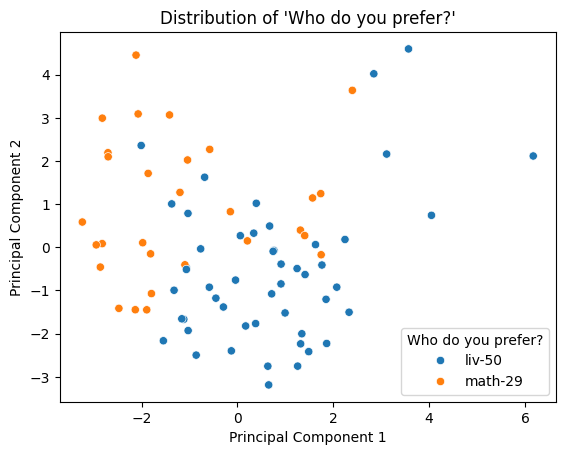

In [21]:
# Create a scatter plot using Seaborn
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue = signify)
plt.title(f"Distribution of '{signify}'")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [21]:
pca_df


,PC1,PC2,Who do you prefer?
0,-1.329626,-2.622797,liv
1,1.384959,1.888524,math
2,-2.023341,-1.874680,math
3,1.970986,-2.513429,liv
4,1.303880,0.916734,math
...,...,...,...
67,-1.430427,0.715562,liv
68,-0.841237,0.016786,liv
69,3.811922,1.414595,liv
70,1.758842,-2.550415,liv
